<img src=https://raw.githubusercontent.com/superwise-ai/quickstart/f395a719ac93377005c6ce8bacebc425bf667cf1/docs/images/white_mode_logo.svg 
width="400" alt="Superwise">

# <a name="EDA"></a>EDA - Exploratory Data Analysis
This notebook will demonstrate how to use Elemeta for EDA. It will illustrate how extracted metafeatures contain information that can be used to predict how many likes a tweet will receive.

---

In [ ]:
!pip install elemeta > /dev/null


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


Let's start by enriching our tweets dataset again:

In [ ]:
from elemeta.dataset.dataset import get_imdb_reviews
reviews = get_imdb_reviews()[:2000]

In [ ]:
reviews

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
1995,"Feeling Minnesota, directed by Steven Baigelma...",negative
1996,THE CELL (2000) Rating: 8/10<br /><br />The Ce...,positive
1997,"This movie, despite its list of B, C, and D li...",negative
1998,I loved this movie! It was all I could do not ...,positive


In [ ]:
from elemeta.nlp.extractors.high_level.regex_match_count import RegexMatchCount
number_of_negative_words = RegexMatchCount(name="number_of_negative_words",regex="hate|sad|terrible|bad")
number_of_positive_words = RegexMatchCount(name="number_of_positive_words",regex="love|wonderful|amazing|happy|good")

In [ ]:
from elemeta.nlp.metadata_extractor_runner import MetadataExtractorsRunner

metadata_extractors_runner = MetadataExtractorsRunner()
metadata_extractors_runner.add_metadata_extractor(number_of_negative_words)
metadata_extractors_runner.add_metadata_extractor(number_of_positive_words)

In [ ]:
# The enrichment process
print("Processing...")
reviews_eda = metadata_extractors_runner.run_on_dataframe(dataframe=reviews,text_column='review')

reviews_eda.head()

Processing...


,review,sentiment,detect_langauge,emoji_count,text_complexity,unique_word_ratio,unique_word_count,word_regex_matches_count,number_count,out_of_vocabulary_count,...,regex_match_count,email_count,link_count,hashtag_count,mention_count,syllable_count,acronym_count,date_count,number_of_negative_words,number_of_positive_words
0,One of the other reviewers has mentioned that ...,positive,en,0,70.02,0.726829,149,380,1,123,...,1,0,0,0,0,419,14,2,0,0
1,A wonderful little production. <br /><br />The...,positive,en,0,56.49,0.739130,85,201,0,75,...,1,0,0,0,0,251,4,0,0,1
2,I thought this was a wonderful way to spend ti...,positive,en,0,60.28,0.776000,97,205,1,58,...,1,0,0,0,0,229,3,3,0,2
3,Basically there's a family where a little boy ...,negative,en,0,74.69,0.694737,66,175,2,64,...,1,0,0,0,0,183,5,1,0,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,en,0,70.43,0.784314,120,283,0,93,...,1,0,0,0,0,327,3,2,0,2


Let's look at the distribution of labels (number of likes). 
We can clearly see a long right-tail distribution.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

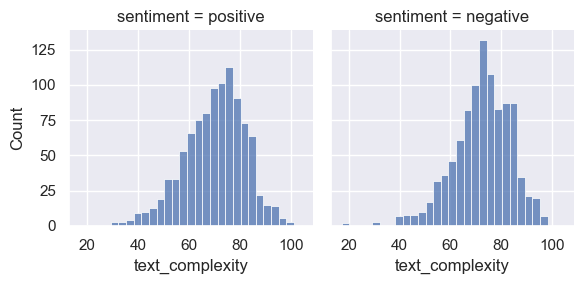

In [ ]:
sns.set_theme(style="darkgrid")
sns.displot(
    reviews_eda, x="text_complexity", col="sentiment",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

According to the below analysis, there is a clear correlation between tweet language and likes, since number_of_likes distribute differently between languages.

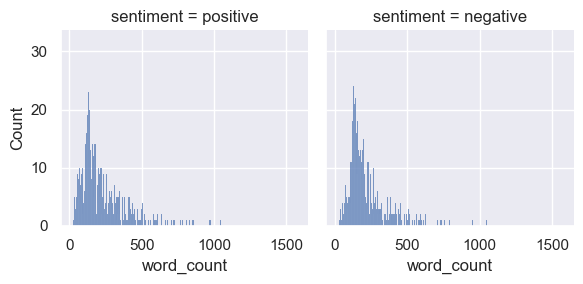

In [ ]:
sns.displot(
    reviews_eda, x="word_count", col="sentiment",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

Apart from a few outliers, tweets with at least one emoji get more likes.

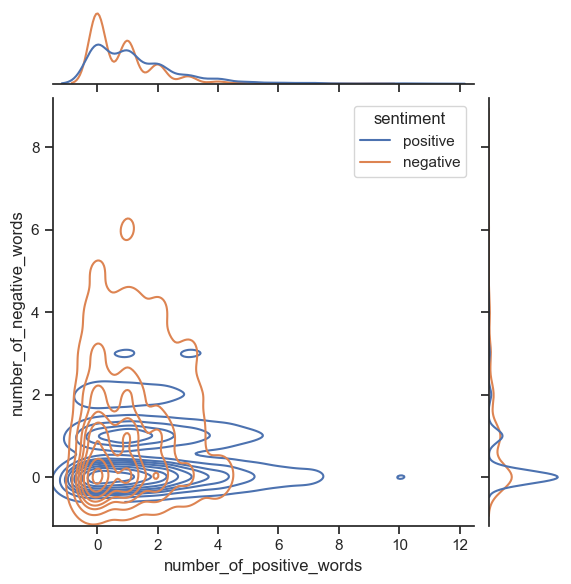

In [ ]:
sns.set_theme(style="ticks")

# Load the penguins dataset

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=reviews_eda,
    x="number_of_positive_words", y="number_of_negative_words", hue="sentiment",
    kind="kde",
)